In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# #mount drive
# from google.colab import drive
# drive.mount('/content/drive')

### **Loading the Dataset**

In [3]:
df=pd.read_csv('HR-Employee-Attrition.tsv',sep='\t')
#reading and loading the dataset
#df = pd.read_csv("/content/drive/MyDrive/HR_Attrition/HR-Employee-Attrition.tsv",sep='\t')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### **Checking the info of the dataset**

In [5]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Observations:**

- There are **1470 observations and 35 columns** in the dataset.
- All the columns have 1470 non-null values, i.e., **there are no missing values in the data.**

**Let's check the unique values in each column** 

In [6]:
# Checking unique values in each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

**Observations:**

- **Employee number is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.
- **EmployeeCount, Over18 and StandardHours have only 1 unique value.** These columns will not add any value to our model hence we can drop them.
- EmployeeCount, Over18 and StandardHours have only 1 unique value. We can drop these columns as they will not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately.

In [7]:
# Dropping the columns 
df=df.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1)

In [8]:
# Creating numerical columns
num_cols=['DailyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears',
          'YearsAtCompany','NumCompaniesWorked','HourlyRate',
          'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','TrainingTimesLastYear']

# Creating categorical variables 
cat_cols= ['Attrition','OverTime','BusinessTravel', 'Department','Education', 'EducationField','JobSatisfaction','EnvironmentSatisfaction','WorkLifeBalance',
           'StockOptionLevel','Gender', 'PerformanceRating', 'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus','RelationshipSatisfaction']

## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate analysis of numerical columns**

In [9]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.00,40.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.00,40.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.00,9.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0


**Observations:**

- **Average employee age is around 37 years**. It has a high range, from 18 years to 60, indicating good age diversity in the organization.
- **At least 50% of the employees live within a 7 KM radius** of the organization. However, there are some extreme values, given that the maximum value is 29 km.
- **The average monthly income of an employee is around USD 6502.** It has a high range of values from around 1K-20K USD, which is to be expected for any organization's income distribution. There is a big difference between the 3rd quartile value (around USD 8400) and the maximum value (nearly USD 20000), showing that the **company's highest earners have a disproportionately large income** in comparison to the rest of the employees. Again, this is fairly common in most organizations.
- **The average salary hike of an employee is around 15%.** At least 50% of employees got a salary hike of 14% or less, with the maximum salary hike being 25%.
- The average number of years an employee is associated with the company is 7. 
- **On average, the number of years since an employee got a promotion is ~2.19**. The majority of employees have been promoted since the last year.

**Let's explore these variables in some more depth by observing their distributions**

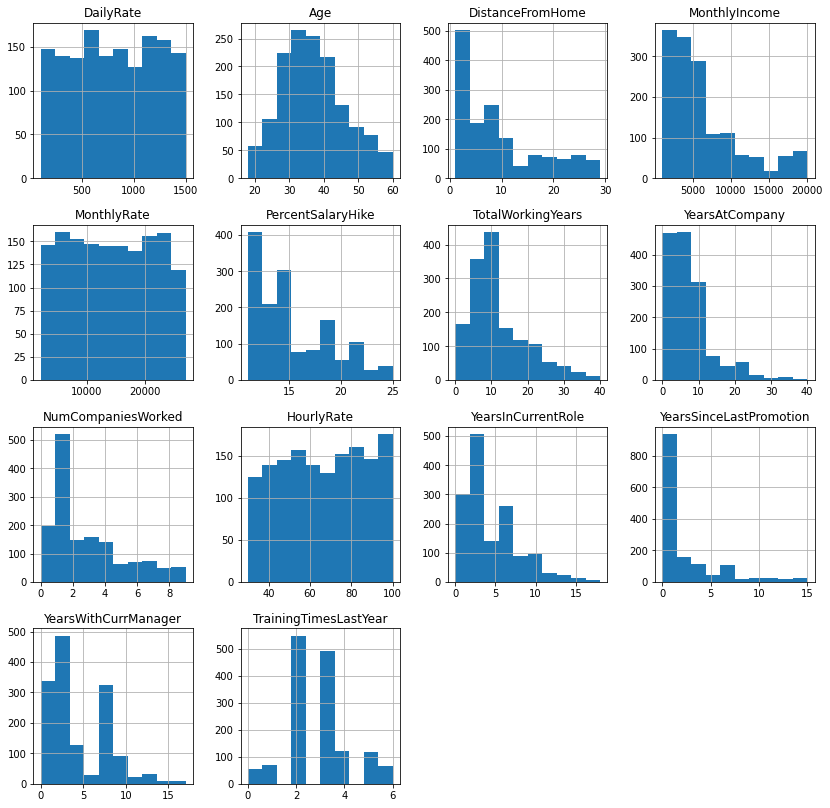

In [10]:
# Creating histograms
df[num_cols].hist(figsize=(14,14))
plt.show()

**Observations:**

- **The age distribution is close to a normal distribution** with the majority of employees between the ages of 25 and 50.

- **The percentage salary hike is skewed to the right**, implying that employees are obtaining smaller increases.

- **MonthlyIncome and TotalWorkingYears are skewed to the right**, indicating that the majority of workers are in entry / mid-level positions in the organization.

- **DistanceFromHome also has a right skewed distribution**, meaning most employees live close to work but there are a few that live further away.

- **On average, an employee has worked at 2.5 companies.** Most employees have worked at only 1 company.

- **The YearsAtCompany variable distribution shows a good proportion of workers with 10+ years**, indicating a significant number of loyal employees at the organization. 

- **The YearsInCurrentRole distribution has three peaks at 0, 2, and 7.** There are a few employees that have even stayed in the same role for 15 years and more.

- **The YearsSinceLastPromotion variable distribution indicates that some employees have not received a promotion in 10-15 years and are still working in the organization.** These employees are assumed to be high work-experience employees in upper-management roles, such as co-founders, C-suite employees etc.

- The distributions of DailyRate, HourlyRate and MonthlyRate appear to be uniform and do not provide much information. It could be that daily rate refers to the income earned per extra day worked while hourly rate could refer to the same concept applied for extra hours worked per day. Since these rates tend to be broadly similar for multiple employees in the same department, that explains the uniform distribution they show. 

In [11]:
df['JobInvolvement'].value_counts(normalize=False).values

array([868, 375, 144,  83])

### **Univariate analysis for categorical variables**

In [12]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=False))
    print('*'*40)

No     1233
Yes     237
Name: Attrition, dtype: int64
****************************************
No     1054
Yes     416
Name: OverTime, dtype: int64
****************************************
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
****************************************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
****************************************
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
****************************************
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
****************************************
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
****************************************
3    453
4    446
2    287
1    284
Name: Envi

**Observations:**

- **The employee attrition rate is 16%.**
- **Around 28% of the employees are working overtime.** This number appears to be on the higher side, and might indicate a stressed employee work-life.
- 71% of the employees have traveled rarely, while around 19% have to travel frequently.
- Around 73% of the employees come from an educational background in the Life Sciences and Medical fields. 
- Over 65% of employees work in the Research & Development department of the organization.
- **Nearly 40% of the employees have low (1) or medium-low (2) job satisfaction and environment satisfaction** in the organization, indicating that the morale of the company appears to be somewhat low.
- **Over 30% of the employees show low (1) to medium-low (2) job involvement.** 
- Over 80% of the employees either have none or very less stock options. 
- **In terms of performance ratings, none of the employees have rated lower than 3 (excellent).** About 85% of employees have a performance rating equal to 3 (excellent), while the remaining have a rating of 4 (outstanding). This could either mean that the majority of employees are top performers, or  the more likely scenario is that the organization could be highly lenient with its performance appraisal process.

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does attrition rate is related with other categorical variables.

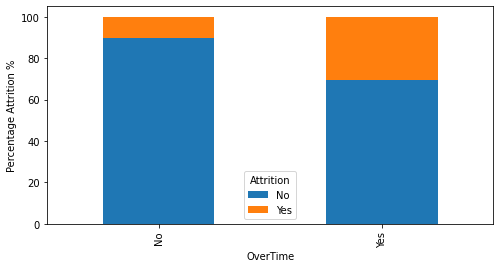

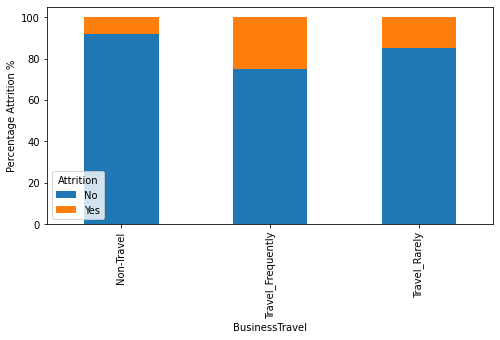

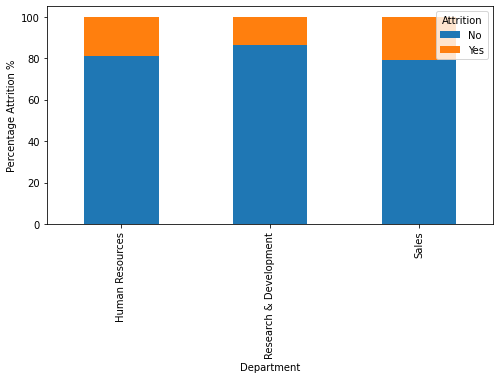

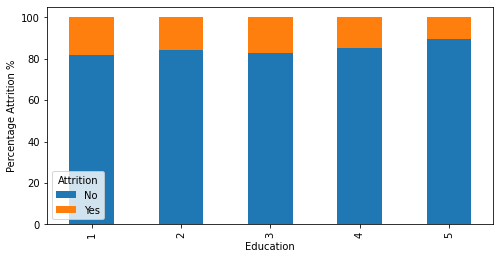

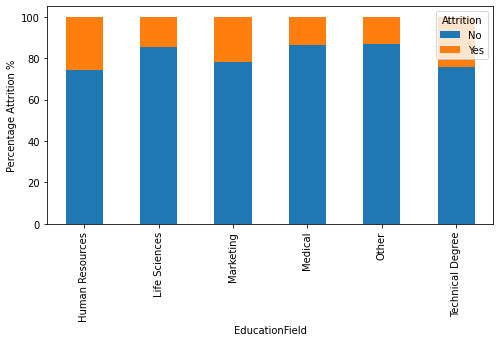

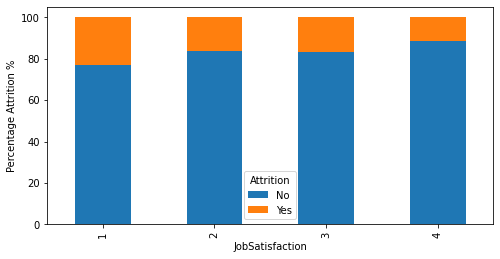

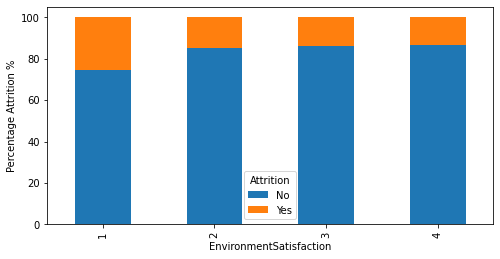

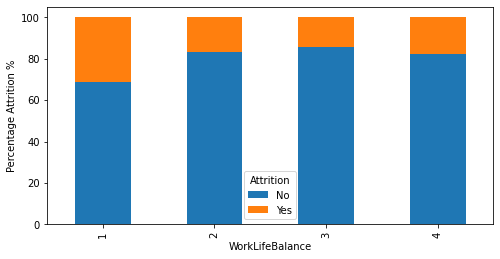

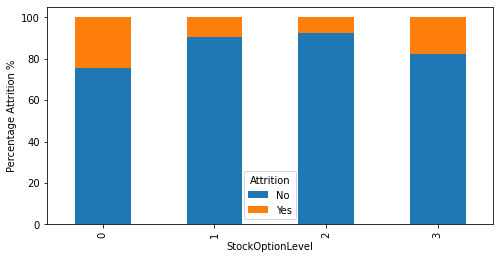

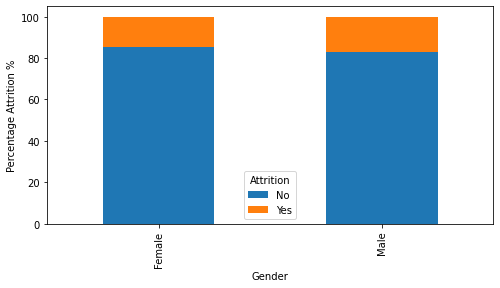

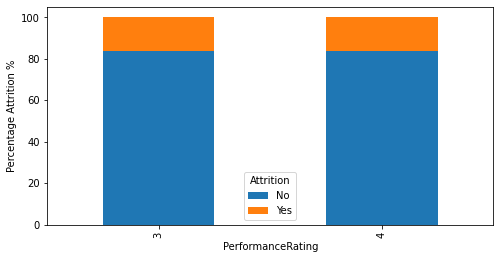

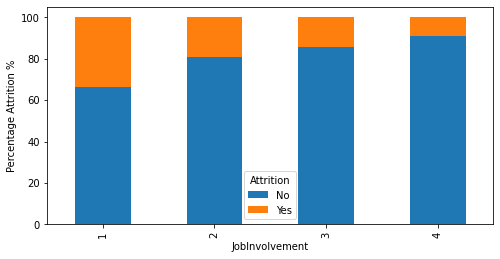

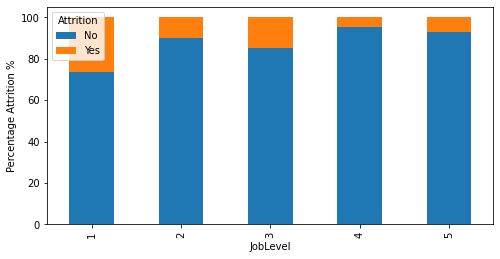

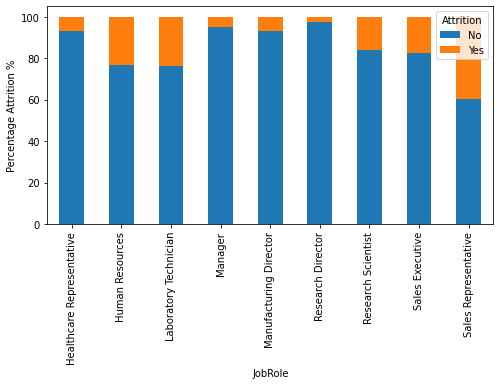

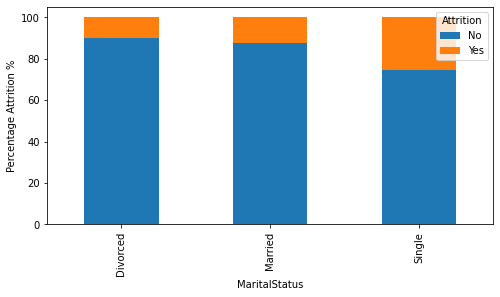

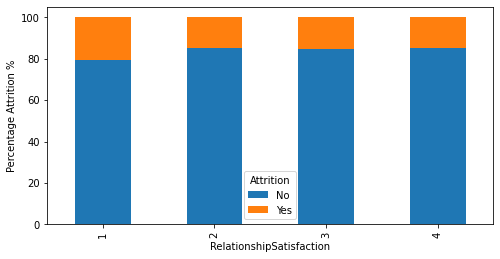

In [13]:
for i in cat_cols:
    if i!='Attrition':
        (pd.crosstab(df[i],df['Attrition'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Attrition %')

**Observations:**
    
- **Employees working overtime have more than a 30% chance of attrition**, 
which is very high compared to the 10% chance of attrition for employees who do not work extra hours.
- As seen earlier, the majority of employees work for the R&D department. The chance of attrition there is ~15%
- **Employees working as sales representatives have an attrition rate of around 40%** while HRs and Technicians have an attrition rate of around 25%. The sales and HR departments have higher attrition rates in comparison to an academic department like Research & Development, an observation that makes intuitive sense keeping in mind the differences in those job profiles. The high-pressure and incentive-based nature of Sales and Marketing roles may be contributing to their higher attrition rates.
- **The lower the employee's job involvement, the higher their attrition chances appear to be, with 1-rated JobInvolvement employees attriting at 35%.** The reason for this could be that employees with lower job involvement might feel left out or less valued and have already started to explore new options, leading to a higher attrition rate.
- **Employees at a lower job level also attrite more,** with 1-rated JobLevel employees showing a nearly 25% chance of attrition. These may be young employees who tend to explore more options in the initial stages of their careers. 
- **A low work-life balance rating clearly leads employees to attrite**, 30% of those in the 1-rated category show attrition.

**Let's check the relationship between attrition and Numerical variables**

In [14]:
# Mean of numerical variables grouped by attrition
df.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observations:**
- **Employees leaving the company have a nearly 30% lower average income and 30% lesser work experience than those who are not.** These could be the employees looking to explore new options and/or increase their salary with a company switch. 
- **Employees showing attrition also tend to live 16% further from the office than those who are not**. The longer commute to and from work could mean they have to spend more time/money every day, and this could be leading to job dissatisfaction and wanting to leave the organization.

**We have found out what kind of employees are leaving the company.**

### **Let's check the relationship between different numerical variables**

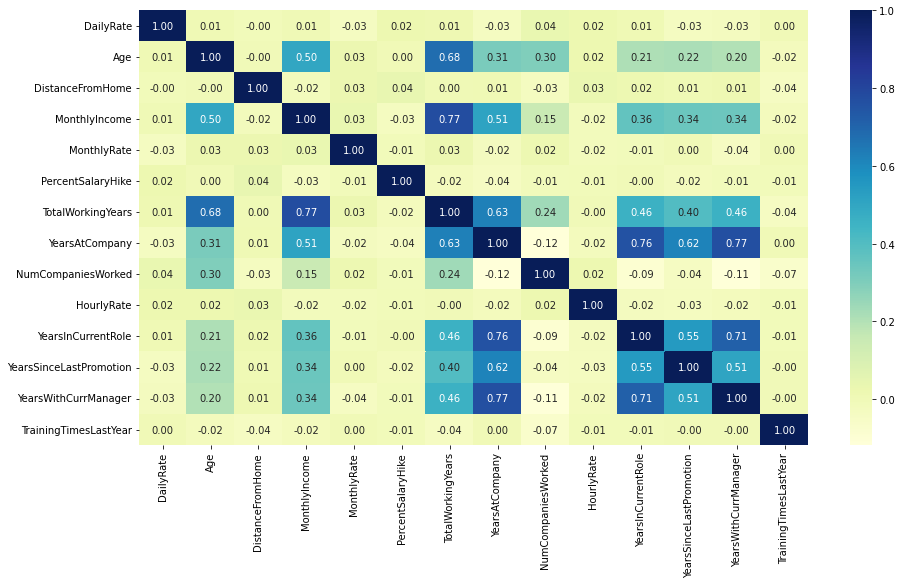

In [15]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- **Total work experience, monthly income, years at company and years with current manager are highly correlated with each other and with employee age** which is easy to understand as these variables show an increase with age for most employees. 
- Years at company and years in current role are correlated with years since last promotion which means that the company is not giving promotions at the right time.

**Now we have explored our data. Let's build the model**

## **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for categorical Variables**

In [16]:
# Creating list of dummy columns
to_get_dummies_for = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction', 'Gender',  'JobInvolvement','JobLevel', 'JobRole', 'MaritalStatus' ]

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      

# Mapping overtime and attrition
dict_OverTime = {'Yes': 1, 'No':0}
dict_attrition = {'Yes': 1, 'No': 0}


df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_attrition)

**Separating the independent variables (X) and the dependent variable (Y)**

In [17]:
# Separating target variable and other variables

Y= df.Attrition
X= df.drop(columns = ['Attrition'])

**Splitting the data into 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [18]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify = Y)

### **Scaling the data**
The **Standard Scaler** method is used, which centers and scales the dataset using the Z-Score. It standardizes features by subtracting the mean and scaling it to have unit variance. 

In [19]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

**Also, let's create a function to calculate and print the classification report and confusion matrix**

In [20]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building two different models:

- **Logistic Regression**
- **Neural Network**

In [21]:
# Fitting logistic regression model

lg=LogisticRegression()
lg.fit(X_train_scaled,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       863
           1       0.82      0.54      0.65       166

    accuracy                           0.91      1029
   macro avg       0.87      0.76      0.80      1029
weighted avg       0.90      0.91      0.90      1029



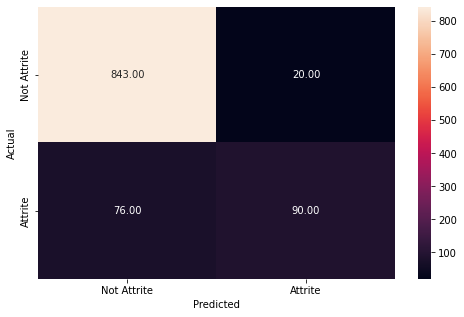

In [22]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train_scaled)

metrics_score(y_train, y_pred_train)

- In classification, the class of interest is considered the positive class. Here, the class of interest is 1 i.e. identifying the employees at risk of attrition.

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that an employee would not attrite and the employee does not attrite 

* False Positive (Actual=0, Predicted=1): Model predicts that an employee would attrite but the employee does not attrite

* False Negative (Actual=1, Predicted=0): Model predicts that an employee would not attrite but the employee attrites

* True Positive (Actual=1, Predicted=1): Model predicts that an employee would attrite and the employee actually attrites

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.73      0.42      0.54        71

    accuracy                           0.88       441
   macro avg       0.81      0.70      0.73       441
weighted avg       0.87      0.88      0.87       441



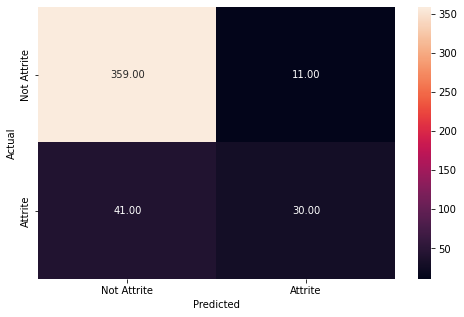

In [23]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of around 91%** on train and  **88%** on test dataset.
- However, **the recall for this model is only around 54% for class 1 on train and 42% on test.**
- As the recall is low, **this model will not perform well** in differentiating out those employees who have a high chance of leaving the company, meaning it will eventually not help in reducing the attrition rate. 
- As we can see from the Confusion Matrix, **this model fails to identify the majority of employees who are at risk of attrition.**

**Let's check the coefficients and find which variables are leading to attrition and which can help to reduce the attrition**

In [24]:
# Printing the coefficients of logistic regression
cols=X.columns

coef_lg=lg.coef_

pd.DataFrame(coef_lg,columns=cols).T.sort_values(by = 0,ascending = False)

,0
OverTime,0.939628
JobRole_Sales Executive,0.930115
BusinessTravel_Travel_Frequently,0.704887
YearsSinceLastPromotion,0.567641
JobLevel_5,0.557689
NumCompaniesWorked,0.520398
MaritalStatus_Single,0.475136
JobRole_Sales Representative,0.449643
BusinessTravel_Travel_Rarely,0.420045
DistanceFromHome,0.412302


**Observations:**


Features which **positively affect** on the attrition rate are:
- OverTime	
- BusinessTravel_Travel_Frequently	
- Department_Research & Development	
- JobRole_Sales Executive	
- MaritalStatus_Single	
- Department_Sales	
- NumCompaniesWorked	
- YearsSinceLastPromotion
- JobLevel_5	
- BusinessTravel_Travel_Rarely
- DistanceFromHome
- YearsAtCompany	
- JobRole_Human Resources	
- JobRole_Sales Representative

Features which **negatively affect** on the attrition rate are:
- MonthlyIncome	
- JobInvolvement_3	
- JobLevel_2	
- EnvironmentSatisfaction_4	
- JobInvolvement_4	
- JobInvolvement_2	
- EnvironmentSatisfaction_3	
- EducationField_Life Sciences	
- EnvironmentSatisfaction_2	
- YearsWithCurrManager	
- JobRole_Research Director	
- TotalWorkingYears	
- JobSatisfaction	


### **Precision-Recall Curve for logistic regression**

**Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.**

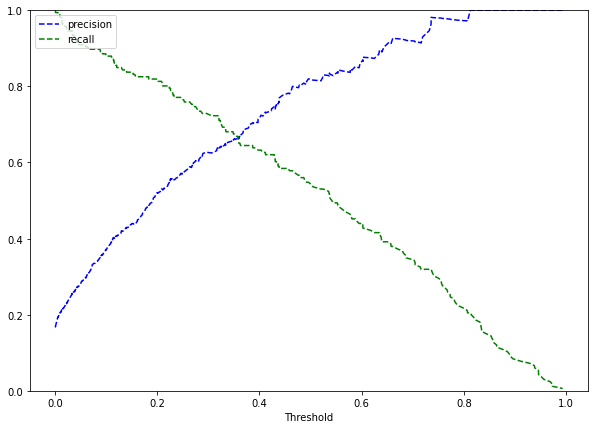

In [25]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train_scaled)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.36**.

**Let's find out the performance of the model at this threshold**

In [26]:
# Calculating the exact threshold where precision and recall are equal.

for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]==recalls_lg[i]:
        print(thresholds_lg[i])

0.3578427057180068


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       863
           1       0.67      0.65      0.66       166

    accuracy                           0.89      1029
   macro avg       0.80      0.79      0.80      1029
weighted avg       0.89      0.89      0.89      1029



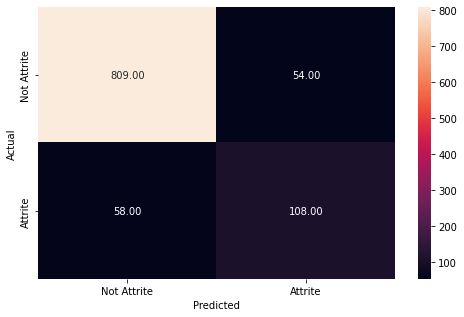

In [27]:
optimal_threshold=.36
y_pred_train = lg.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Observations**
- **The model performance has improved. The recall has increased significantly for class 1.**
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       370
           1       0.59      0.55      0.57        71

    accuracy                           0.87       441
   macro avg       0.75      0.74      0.75       441
weighted avg       0.86      0.87      0.86       441



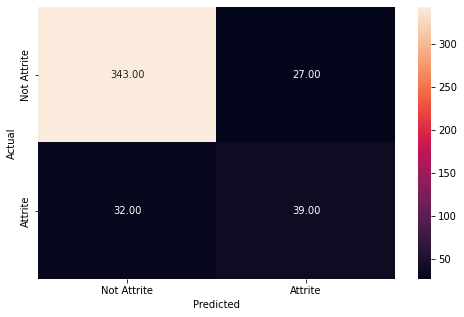

In [28]:
optimal_threshold=.36
y_pred_test = lg.predict_proba(X_test_scaled)

metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observation:**
- The model is giving **similar performance on the test and train data** i.e. the model is giving a generalized performance.
- **The recall of the test data has increased significantly** while at the same time, the precision has decreased, which is to be expected while adjusting the threshold.
- The average recall and precision for the model are good but let's see if we can get better performance using  neural networks algorithm.

## **Neural Network Model Building**

In neural networks, there are so many hyper-parameters that you can play around with and tune the network to get the best results. Some of them are - 



1.   Number of hidden layers
2.   Number of neurons in each hidden layer
3.   Activation functions in hidden layers
4.   Optimizers
5.   Learning rate
6.  Dropout

and so on...

First, let's set the seed for random number generators in NumPy, Python, and TensorFlow to be able to reproduce the same results everytime we run the code.

In [29]:
# # Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

**Let's build a feed forward neural network with 2 hidden layers and the output layer.**

In [30]:
# # We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(54,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation='sigmoid'))

Once we are done with the model architecture, we need to compile the model, where we need to provide the loss function that we want to optimize, the optimization algorithm, and the evaluation metric that we are interested in to evaluate the model.

Since this is a binary classification task, we will be minimizing the **binary_crossentropy** and we try **adamax** optimizer with **accuracy** as the metric and see the model's summary.



In [31]:
model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,361
Trainable params: 15,361
Non-trainable params: 0
_________________________________________________________________


From the above summary, we can see that this architecture will train a total of **15,361** parameters i.e. weights and biases in the network.

### **Training the model**

In [32]:
history_1 = model_1.fit(X_train_scaled, 
                    y_train,
                    validation_split=0.1, 
                    epochs=150, 
                    verbose=2)

Epoch 1/150
29/29 - 1s - loss: 0.4977 - accuracy: 0.8164 - val_loss: 0.5137 - val_accuracy: 0.7961 - 1s/epoch - 39ms/step
Epoch 2/150
29/29 - 0s - loss: 0.4250 - accuracy: 0.8434 - val_loss: 0.4691 - val_accuracy: 0.7961 - 91ms/epoch - 3ms/step
Epoch 3/150
29/29 - 0s - loss: 0.3953 - accuracy: 0.8445 - val_loss: 0.4447 - val_accuracy: 0.7961 - 75ms/epoch - 3ms/step
Epoch 4/150
29/29 - 0s - loss: 0.3852 - accuracy: 0.8434 - val_loss: 0.4249 - val_accuracy: 0.7961 - 89ms/epoch - 3ms/step
Epoch 5/150
29/29 - 0s - loss: 0.3645 - accuracy: 0.8467 - val_loss: 0.4149 - val_accuracy: 0.7961 - 84ms/epoch - 3ms/step
Epoch 6/150
29/29 - 0s - loss: 0.3556 - accuracy: 0.8521 - val_loss: 0.4002 - val_accuracy: 0.7961 - 124ms/epoch - 4ms/step
Epoch 7/150
29/29 - 0s - loss: 0.3402 - accuracy: 0.8553 - val_loss: 0.3946 - val_accuracy: 0.8058 - 83ms/epoch - 3ms/step
Epoch 8/150
29/29 - 0s - loss: 0.3325 - accuracy: 0.8585 - val_loss: 0.3890 - val_accuracy: 0.8058 - 96ms/epoch - 3ms/step
Epoch 9/150
29/2

### **Plotting Accuracy vs Epoch Curve**

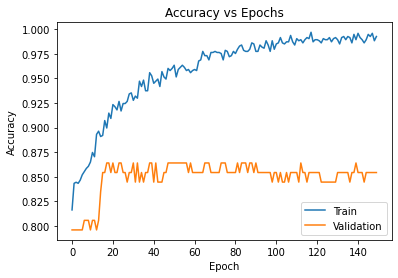

In [33]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- The training accuracy is fluctuating but overall it is increasing with the increase in the epochs.
- The validation accuracy is constantly fluctuating after 20 epochs.

Let's try to increase the model complexity by tuning some of the hyper-parameters mentioned earlier and check if we can improve the model performance. Out of all the options we have, let's try to change the number of hidden layers, the number of neurons in each hidden layer, the activation function in the hidden layer, and the optimizer from **adamax** to **adam**. Also, we have observed that validation accuracy became constant after some epochs, let's try less number of epochs which would also reduce the computation time. 

First, we need to clear the previous model's history from the session. In Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [34]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [35]:
# # Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [36]:
model_2 = Sequential()
model_2.add(Dense(128, activation='tanh', input_shape=(54,)))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [37]:
model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-traina

In [38]:
history_2 = model_2.fit(X_train_scaled, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=100, 
                    verbose=2)

Epoch 1/100
29/29 - 1s - loss: 0.6357 - accuracy: 0.6285 - val_loss: 0.5030 - val_accuracy: 0.8058 - 878ms/epoch - 30ms/step
Epoch 2/100
29/29 - 0s - loss: 0.4435 - accuracy: 0.8413 - val_loss: 0.3777 - val_accuracy: 0.8932 - 108ms/epoch - 4ms/step
Epoch 3/100
29/29 - 0s - loss: 0.3450 - accuracy: 0.8715 - val_loss: 0.3233 - val_accuracy: 0.8835 - 104ms/epoch - 4ms/step
Epoch 4/100
29/29 - 0s - loss: 0.2776 - accuracy: 0.9028 - val_loss: 0.3303 - val_accuracy: 0.8738 - 86ms/epoch - 3ms/step
Epoch 5/100
29/29 - 0s - loss: 0.2663 - accuracy: 0.8963 - val_loss: 0.3661 - val_accuracy: 0.8252 - 101ms/epoch - 3ms/step
Epoch 6/100
29/29 - 0s - loss: 0.2462 - accuracy: 0.9071 - val_loss: 0.3382 - val_accuracy: 0.8932 - 87ms/epoch - 3ms/step
Epoch 7/100
29/29 - 0s - loss: 0.2320 - accuracy: 0.9136 - val_loss: 0.3652 - val_accuracy: 0.8641 - 87ms/epoch - 3ms/step
Epoch 8/100
29/29 - 0s - loss: 0.2201 - accuracy: 0.9179 - val_loss: 0.3552 - val_accuracy: 0.8738 - 89ms/epoch - 3ms/step
Epoch 9/100

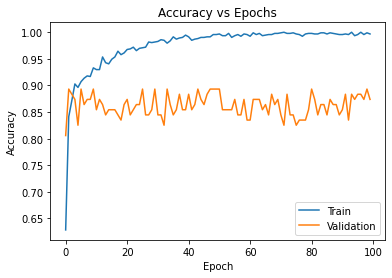

In [39]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:** 

- We are able to slightly improve the model performance on the training data - accuracy has increased but the validation accuracy has been constantly fluctuating between the accuracy of **80%** and **90%**

**Let's try to further tune some of the hyper-parameters and check if we can improve the model performance.**

We will use learning_rate = 0.0003 for the optimizer in the training process and increase the model complexity by further increasing the number of layers, the number of nodes in each layer, and the epochs.

In [40]:
# # Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [41]:
# # Fixing the seed for random number generators
np.random.seed(42)

import random
random.seed(42)

tf.random.set_seed(42)

In [42]:
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(54,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))

In [43]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003), metrics=['accuracy'])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               14080     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

- Notice that the number of trainable parameters has increased substantially as compared to previous models.

In [44]:
history_3 = model_3.fit(X_train_scaled, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=300,
                    verbose=2)

Epoch 1/300
29/29 - 1s - loss: 0.6395 - accuracy: 0.6415 - val_loss: 0.5441 - val_accuracy: 0.7476 - 970ms/epoch - 33ms/step
Epoch 2/300
29/29 - 0s - loss: 0.5217 - accuracy: 0.7711 - val_loss: 0.4395 - val_accuracy: 0.8738 - 121ms/epoch - 4ms/step
Epoch 3/300
29/29 - 0s - loss: 0.4308 - accuracy: 0.8348 - val_loss: 0.3784 - val_accuracy: 0.8641 - 126ms/epoch - 4ms/step
Epoch 4/300
29/29 - 0s - loss: 0.3540 - accuracy: 0.8650 - val_loss: 0.3462 - val_accuracy: 0.8641 - 105ms/epoch - 4ms/step
Epoch 5/300
29/29 - 0s - loss: 0.3244 - accuracy: 0.8866 - val_loss: 0.3339 - val_accuracy: 0.8835 - 106ms/epoch - 4ms/step
Epoch 6/300
29/29 - 0s - loss: 0.2859 - accuracy: 0.8898 - val_loss: 0.3204 - val_accuracy: 0.8738 - 108ms/epoch - 4ms/step
Epoch 7/300
29/29 - 0s - loss: 0.2809 - accuracy: 0.8920 - val_loss: 0.3244 - val_accuracy: 0.8932 - 108ms/epoch - 4ms/step
Epoch 8/300
29/29 - 0s - loss: 0.2682 - accuracy: 0.8974 - val_loss: 0.3323 - val_accuracy: 0.8835 - 128ms/epoch - 4ms/step
Epoch 9

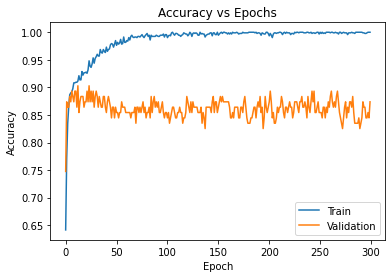

In [45]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- This model is giving a generalized performance with about 99% accuracy on the train and about 88% on the test data.
- The validation accuracy and the training accuracy has improved significantly.
- Among all three models, model 3 has given the best performance. Let's evaluate its performance on the train and test data.

### **Model evaluation on the train and test data**

In [46]:
model_3.evaluate(X_train_scaled, y_train, verbose = 1)
train_pred = np.round(model_3.predict(X_train_scaled))

33/33 [==============================] - 0s 1ms/step


In [47]:
model_3.evaluate(X_test_scaled, y_test, verbose = 1)
test_pred = np.round(model_3.predict(X_test_scaled))

14/14 [==============================] - 0s 2ms/step


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       863
           1       1.00      0.92      0.96       166

    accuracy                           0.99      1029
   macro avg       0.99      0.96      0.98      1029
weighted avg       0.99      0.99      0.99      1029



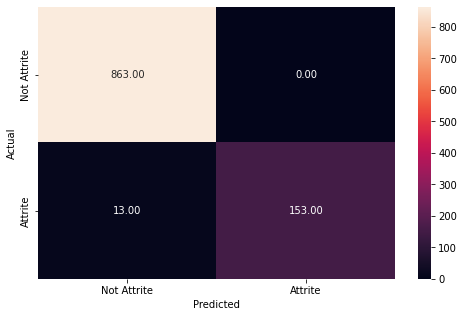

In [49]:
metrics_score(y_train, train_pred)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.78      0.39      0.52        71

    accuracy                           0.88       441
   macro avg       0.84      0.69      0.73       441
weighted avg       0.88      0.88      0.87       441



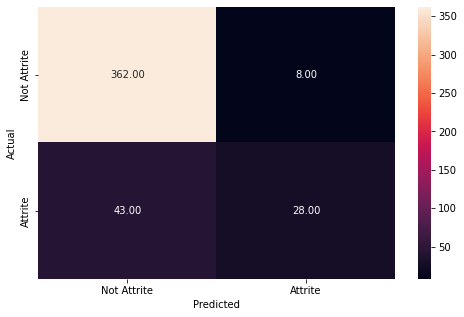

In [50]:
metrics_score(y_test, test_pred)